In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [3]:
data = pd.read_csv("Data/Electric Vehicle Sales by State in India.csv")
data.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB


In [5]:
data.shape

(96845, 8)

In [6]:
data.describe()

,Year,EV_Sales_Quantity
count,96845.000000,96845.000000
mean,2018.622768,37.108896
std,2.895581,431.566675
min,2014.000000,0.000000
25%,2016.000000,0.000000
50%,2019.000000,0.000000
75%,2021.000000,0.000000
max,2024.000000,20584.000000


In [7]:
print(data.isnull().sum())

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64


In [8]:
# Converting Date to datetime
data['Date'] = pd.to_datetime(data['Date'])
# Handling missing values
data['EV_Sales_Quantity'] = data['EV_Sales_Quantity'].fillna(0)
# Converting EV_Sales_Quantity to integer
data['EV_Sales_Quantity'] = data['EV_Sales_Quantity'].astype(int)

In [9]:
# Analysis functions
def total_sales_by_year(df):
    return df.groupby('Year')['EV_Sales_Quantity'].sum()

def sales_by_vehicle_category(df):
    return df.groupby('Vehicle_Category')['EV_Sales_Quantity'].sum()

def top_states_by_sales(df, year=2023):
    return df[df['Year'] == year].groupby('State')['EV_Sales_Quantity'].sum().nlargest(5)

def sales_trend_by_category(df):
    return df.groupby(['Year', 'Vehicle_Category'])['EV_Sales_Quantity'].sum().unstack()

def top_vehicle_types(df):
    return df.groupby('Vehicle_Type')['EV_Sales_Quantity'].sum().nlargest(5)

def state_category_distribution(df, year=2023):
    return df[df['Year'] == year].groupby(['State', 'Vehicle_Category'])['EV_Sales_Quantity'].sum().unstack()

def monthly_sales_trend(df, year=2023):
    return df[df['Year'] == year].groupby('Month_Name')['EV_Sales_Quantity'].sum()

def sales_by_vehicle_class(df):
    return df.groupby('Vehicle_Class')['EV_Sales_Quantity'].sum()

def growth_rate(df):
    yearly_sales = total_sales_by_year(df)
    growth = yearly_sales.pct_change() * 100
    return growth

def state_wise_growth(df):
    state_yearly = df.groupby(['State', 'Year'])['EV_Sales_Quantity'].sum().unstack()
    growth = state_yearly.pct_change(axis=1) * 100
    return growth.mean(axis=1).nlargest(5)

def category_distribution_by_state(df, state, year=2023):
    return df[(df['State'] == state) & (df['Year'] == year)].groupby('Vehicle_Category')['EV_Sales_Quantity'].sum()

def sales_by_vehicle_type_year(df):
    return df.groupby(['Year', 'Vehicle_Type'])['EV_Sales_Quantity'].sum().unstack()

def top_states_by_vehicle_type(df, vehicle_type, year=2023):
    return df[(df['Vehicle_Type'] == vehicle_type) & (df['Year'] == year)].groupby('State')['EV_Sales_Quantity'].sum().nlargest(5)

def sales_correlation(df):
    return df.groupby(['Year', 'State'])['EV_Sales_Quantity'].sum().unstack().corr()

def seasonal_pattern(df):
    monthly_avg = df.groupby(['Year', 'Month_Name'])['EV_Sales_Quantity'].sum().unstack()
    return monthly_avg.mean()

In [12]:
# Main analysis function
def analyze_ev_sales():
    
    df = data
    
    # Creating visualizations
    plt.figure(figsize=(15, 10))
    
    # 1. Total sales trend over years
    plt.subplot(3, 2, 1)
    total_sales_by_year(df).plot(kind='line', title='Total EV Sales by Year')
    plt.xlabel('Year')
    plt.ylabel('Sales Quantity')
    
    # 2. Sales by vehicle category
    plt.subplot(3, 2, 2)
    sales_by_vehicle_category(df).plot(kind='bar', title='EV Sales by Vehicle Category')
    plt.xlabel('Vehicle Category')
    plt.ylabel('Sales Quantity')
    
    # 3. Top 5 states by sales in 2023
    plt.subplot(3, 2, 3)
    top_states_by_sales(df).plot(kind='bar', title='Top 5 States by EV Sales (2023)')
    plt.xlabel('State')
    plt.ylabel('Sales Quantity')
    
    # 4. Sales trend by category over years
    plt.subplot(3, 2, 4)
    sales_trend_by_category(df).plot(kind='line', title='Sales Trend by Vehicle Category')
    plt.xlabel('Year')
    plt.ylabel('Sales Quantity')
    
    # 5. Top 5 vehicle types
    plt.subplot(3, 2, 5)
    top_vehicle_types(df).plot(kind='bar', title='Top 5 Vehicle Types by Sales')
    plt.xlabel('Vehicle Type')
    plt.ylabel('Sales Quantity')
    
    plt.tight_layout()
    plt.savefig('ev_sales_analysis.png')
    plt.close()

    # Collecting insights
    insights = []
    
    # Insight 1: Total sales growth
    total_sales = total_sales_by_year(df)
    insights.append(f"1. Total EV sales increased from {total_sales[2014]:.0f} in 2014 to {total_sales[2023]:.0f} in 2023")
    
    # Insight 2: Dominant vehicle category
    category_sales = sales_by_vehicle_category(df)
    top_category = category_sales.idxmax()
    insights.append(f"2. {top_category} is the dominant vehicle category with {category_sales[top_category]:.0f} total sales")
    
    # Insight 3: Top state
    top_state = top_states_by_sales(df).index[0]
    insights.append(f"3. {top_state} led EV sales in 2023 with {top_states_by_sales(df)[top_state]:.0f} units")
    
    # Insight 4: Growth rate
    growth = growth_rate(df)
    insights.append(f"4. Average yearly growth rate: {growth.mean():.2f}%")
    
    # Insight 5: Top vehicle type
    top_type = top_vehicle_types(df).index[0]
    insights.append(f"5. {top_type} is the most popular vehicle type with {top_vehicle_types(df)[top_type]:.0f} units sold")
    
    # Insight 6: State with highest growth
    top_growth_state = state_wise_growth(df).index[0]
    insights.append(f"6. {top_growth_state} showed the highest average growth rate")
    
    # Insight 7: E-Rickshaw adoption
    erickshaw_sales = df[df['Vehicle_Type'] == '3W_Shared_LowSpeed']['EV_Sales_Quantity'].sum()
    insights.append(f"7. E-Rickshaws (3W_Shared_LowSpeed) total sales: {erickshaw_sales:.0f}")
    
    # Insight 8: 2-Wheeler popularity
    two_wheeler_sales = df[df['Vehicle_Category'] == '2-Wheelers']['EV_Sales_Quantity'].sum()
    insights.append(f"8. 2-Wheelers account for {two_wheeler_sales:.0f} total sales")
    
    # Insight 9: Uttar Pradesh category distribution
    up_dist = category_distribution_by_state(df, 'Uttar Pradesh')
    insights.append(f"9. Uttar Pradesh's top category in 2023: {up_dist.idxmax()} with {up_dist.max():.0f} units")
    
    # Insight 10: Monthly sales pattern
    monthly_trend = monthly_sales_trend(df)
    peak_month = monthly_trend.idxmax()
    insights.append(f"10. Peak sales month in 2023: {peak_month} with {monthly_trend[peak_month]:.0f} units")
    
    # Insight 11: Bus sales trend
    bus_sales = df[df['Vehicle_Category'] == 'Bus']['EV_Sales_Quantity'].sum()
    insights.append(f"11. Total bus sales: {bus_sales:.0f}")
    
    # Insight 12: Delhi's contribution
    delhi_sales = df[df['State'] == 'Delhi']['EV_Sales_Quantity'].sum()
    total_sales_all = df['EV_Sales_Quantity'].sum()
    insights.append(f"12. Delhi contributes {delhi_sales/total_sales_all*100:.2f}% of total EV sales")
    
    # Insight 13: Vehicle class diversity
    class_count = len(df['Vehicle_Class'].unique())
    insights.append(f"13. Dataset includes {class_count} unique vehicle classes")
    
    # Insight 14: 4-Wheeler personal use
    four_wheeler_personal = df[df['Vehicle_Type'] == '4W_Personal']['EV_Sales_Quantity'].sum()
    insights.append(f"14. 4-Wheeler personal vehicles sold: {four_wheeler_personal:.0f}")
    
    # Insight 15: Regional variations
    state_count = len(df['State'].unique())
    insights.append(f"15. EV sales recorded across {state_count} states/UTs")
    
    # Insight 16: Low-speed vehicle adoption
    low_speed_sales = df[df['Vehicle_Type'].str.contains('LowSpeed')]['EV_Sales_Quantity'].sum()
    insights.append(f"16. Low-speed vehicles (E-Rickshaw) total sales: {low_speed_sales:.0f}")
    
    # Printing insights
    print("Electric Vehicle Sales Analysis Insights:")
    for insight in insights:
        print(insight)

Electric Vehicle Sales Analysis Insights:
1. Total EV sales increased from 2392 in 2014 to 1525179 in 2023
2. 2-Wheelers is the dominant vehicle category with 1808105 total sales
3. Uttar Pradesh led EV sales in 2023 with 277300 units
4. Average yearly growth rate: 122.54%
5. 2W_Personal is the most popular vehicle type with 1796340 units sold
6. Andaman & Nicobar Island showed the highest average growth rate
7. E-Rickshaws (3W_Shared_LowSpeed) total sales: 1408127
8. 2-Wheelers account for 1808105 total sales
9. Uttar Pradesh's top category in 2023: 3-Wheelers with 232595 units
10. Peak sales month in 2023: may with 158131 units
11. Total bus sales: 7009
12. Delhi contributes 7.47% of total EV sales
13. Dataset includes 73 unique vehicle classes
14. 4-Wheeler personal vehicles sold: 130676
15. EV sales recorded across 34 states/UTs
16. Low-speed vehicles (E-Rickshaw) total sales: 1498783


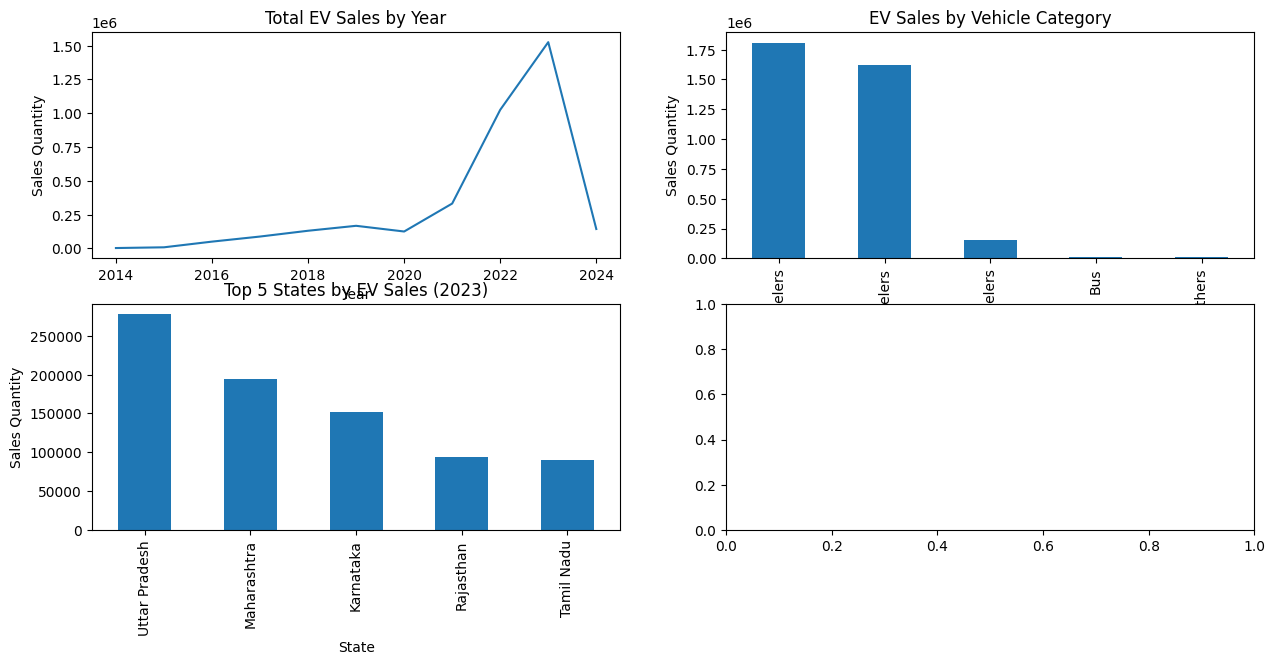

In [13]:

if __name__ == "__main__":
    analyze_ev_sales()